## Simple Linear Regression
In this notebook we will use data on house sales in King County to predict house prices using simple (one input) linear regression. We will:

Write a function to compute the Simple Linear Regression weights using the closed form solution
Write a function to make predictions of the output given the input feature
Turn the regression around to predict the input given the output
Compare two different models for predicting house prices


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
train_df = pd.read_csv('kc_house_train_data.csv')
test_df = pd.read_csv('kc_house_test_data.csv')

In [10]:
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
train_df[['price','sqft_living','bedrooms']].describe()

,price,sqft_living,bedrooms
count,1.738400e+04,17384.000000,17384.000000
mean,5.393666e+05,2080.029510,3.369363
std,3.696912e+05,921.630888,0.906468
min,7.500000e+04,290.000000,0.000000
25%,3.200000e+05,1420.000000,3.000000
50%,4.500000e+05,1910.000000,3.000000
75%,6.400000e+05,2550.000000,4.000000
max,7.700000e+06,13540.000000,10.000000


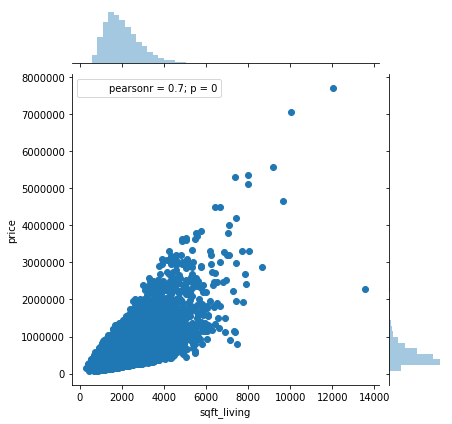

In [16]:
sns.jointplot(x='sqft_living', y='price', data=train_df)

## Create simple linear regression based on sqft 

In [17]:
# Create a simple linear regression model. Function accepts input feature and output as lists. 
# Returns the slope and intercept  using a closed form solution.

def simple_linear_regression(input_feature, output):
    N = len(input_feature)
    
    xy_sum = (input_feature*output).sum()
    x_sum = input_feature.sum()
    y_sum = output.sum()
    x2_sum = (input_feature*input_feature).sum()
    
    slope = (xy_sum - (x_sum*y_sum)/N)/(x2_sum - (x_sum*x_sum)/N)
    
    intercept = (y_sum/N) - ((slope*x_sum)/N)
    
    return (intercept, slope)

In [23]:
# Test the function 

test_input = pd.Series(range(10))
test_output = 5 + 3*test_input

(test_intercept, test_slope) = simple_linear_regression(test_input, test_output)
print("Test Intercept: ",test_intercept)
print("Test Slope: ", test_slope)

Test Intercept:  5.0
Test Slope:  3.0


## Fit the sqft model to train data

In [24]:
# Fit the model to train data and get the estimated slope and intercept

sqft_intercept, sqft_slope = simple_linear_regression(train_df['sqft_living'], train_df['price'])
print("Sqft Intercept: ", sqft_intercept)
print("Sqft Slope: ", sqft_slope)

Sqft Intercept:  -47116.07907289418
Sqft Slope:  281.9588396303426


## Get regression predictions

In [25]:
# Function to return predictions. Takes as input the input feature, intercept, slope

def get_regression_predictions(input_feature, intercept, slope):
    predicted_output = intercept + slope*input_feature
    return(predicted_output)

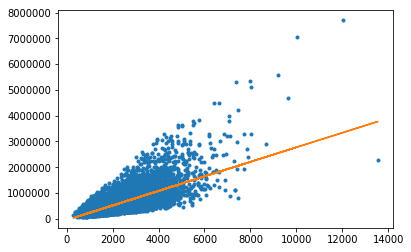

In [42]:
# Plot the regression line

plt.plot(train_df['sqft_living'], train_df['price'], '.',
         train_df['sqft_living'], get_regression_predictions(train_df['sqft_living'], sqft_intercept, sqft_slope),'-')

In [31]:
sqft1 = 2650
price1 = get_regression_predictions(sqft1, sqft_intercept, sqft_slope)
print('Predicted price for %d squarefeet house is %.2f' % (sqft1, price1))

Predicted price for 2650 squarefeet house is 700074.85


## Get residual sum of squares metric

In [32]:
# Function to get residual errors

def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    predictions = intercept + slope*input_feature
    RSS = ((output - predictions)**2).sum()
    return(RSS)

In [35]:
rss_sqft = get_residual_sum_of_squares(train_df['sqft_living'], train_df['price'], sqft_intercept, sqft_slope)
print('RSS for predicting prices based on sqft model is %g' % rss_sqft)

RSS for predicting prices based on sqft model is 1.20192e+15


## Create inverse function to get sqft from price

In [37]:
# Inverse Function to get the sqft from the output variable price

def inverse_regression_predictions(output, intercept, slope):
    estimated_input = (output - intercept)/slope
    return(estimated_input)

In [38]:
price2 = 800000
sqft2 = inverse_regression_predictions(price2, sqft_intercept, sqft_slope)
print("The estimated squarefeet for price %f is %d" % (price2, sqft2))

The estimated squarefeet for price 800000.000000 is 3004


## Create simple linear regression model based on bedrooms

In [39]:
# Create a regression model based on number of bedrooms

(bedrooms_intercept, bedrooms_slope) = simple_linear_regression(train_df['bedrooms'], train_df['price'])
print('Bedroom intercept: ', bedrooms_intercept)
print('Bedroom slope: ', bedrooms_slope)

Bedroom intercept:  109473.1776229596
Bedroom slope:  127588.95293398784


## Compare the RSS of both models on test data

In [41]:
# RSS of test data from sqft model
rss_sqft_test = get_residual_sum_of_squares(test_df['sqft_living'], test_df['price'], sqft_intercept, sqft_slope)
print('RSS for test data from sqft model is %g' % rss_sqft_test)

# RSS of test data from bedrooms model
rss_bedrooms_test = get_residual_sum_of_squares(test_df['bedrooms'], test_df['price'], bedrooms_intercept, bedrooms_slope)
print('RSS for test data from bedrooms model is %g' % rss_bedrooms_test)

RSS for test data from sqft model is 2.75403e+14
RSS for test data from bedrooms model is 4.93365e+14


The RSS from sqft model is lower than the bedroom model.